In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression

### 7.1 Polynomial Regression

In [2]:
wage = pd.read_csv('../datasets/Wage.csv')

In [3]:
wage

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [4]:
X = wage['age']
y = wage['wage']
y_250 = (wage['wage'] > 250).astype('int')

(18.0, 80.0)

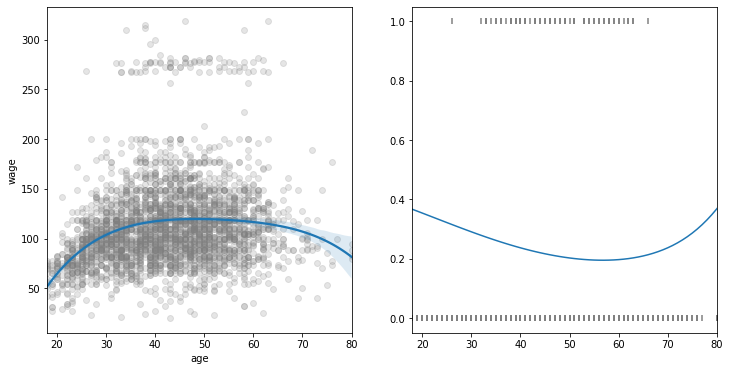

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#ax1.plot(X, y, 'ko', markerfacecolor='gray', alpha=0.2)
sns.regplot(x=X, y=y, order=4, ax=ax1, ci=95,scatter_kws={"color": 'gray', 'edgecolor': 'gray', 'alpha': 0.2})
X_poly = PolynomialFeatures(degree=4).fit_transform(X.to_numpy().reshape(-1, 1))
logreg = LogisticRegression(class_weight=dict([(0,   1),(1, 10)])).fit(X_poly, y_250)
ax2.scatter(X,y_250,marker='|', c='gray')
xx = np.linspace(X.min(), X.max(), 100)
xx_poly = PolynomialFeatures(degree=4).fit_transform(xx.reshape(-1, 1))
ax2.plot(logreg.predict_proba(xx_poly)[:, 1])
ax2.set_xlim(X.min(), X.max())

In [6]:
from sklearn.metrics import precision_recall_fscore_support

In [7]:
precision_recall_fscore_support(y_250, logreg.predict(X_poly))

(array([0.97348103, 0.        ]),
 array([0.99281068, 0.        ]),
 array([0.98305085, 0.        ]),
 array([2921,   79], dtype=int64))